In [16]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path
import csv
import gc
import copy
import os
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [17]:
DATA_DIR="/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/comm_congestion"
#robots = [4, 6]
seeds = [i for i in range(0, 30)]
print(seeds)
robots = [2,4,6,10,20,40,60,80,100,120,150]
rab_ranges = [4,8,12]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [11]:
FIG_DIR = "/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/stagnation/"

In [18]:
def get_name(n_robot,seed,range):
    fname = DATA_DIR +'/'+'perf_communication_congestion_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    #print(fname)
    return fname

In [19]:
def column_position(n_robot,seed,range):
    fname = DATA_DIR +'/'+'pos_communication_congestion_'+str(n_robot)+'_'+str(range)+'_'+str(seed)+'.txt'
    #print(fname)
    return fname

In [20]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('collision_'+str(k))
        n.append('conflicts_'+str(k))
        n.append('state_'+str(k))
        n.append('estimate_'+str(k))
        n.append('white_nei_agg_'+str(k))
        n.append('black_nei_agg_'+str(k))
        n.append('decision_flag_'+str(k))

    
    n.append('exp_finished')
    return n

In [21]:
def get_names_for_position(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
        n.append('state_'+str(k))
    
    n.append('exp_finished')
    return n

Total collision per robot in the whole experiment, time_taken and estimate average. 

In [22]:
total_collision = pd.DataFrame()
total_time = pd.DataFrame()
total_conflicts = pd.DataFrame()

for robot in robots:
    for seed in seeds: 
        for range_ in rab_ranges:
            fname = get_name(robot,seed,range_)
            perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
            df = pd.DataFrame(data=perf_frame)
            collision_sum = pd.DataFrame() 
            conflicts_sum = pd.DataFrame()
            time_ = pd.DataFrame()
        
            collision = df.filter(regex='collision').tail(1).reset_index(drop=True)
            collision_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            collision_sum['collision_sum'] = collision.sum(axis='columns')/(robot*10)
            collision_sum['number_of_robots'] = robot
            collision_sum['seed'] = seed
            collision_sum['range'] = range_/10

            conflicts = df.filter(regex='conflicts').tail(1).reset_index(drop=True)
            conflicts_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            conflicts_sum['conflicts_sum'] = conflicts.sum(axis='columns')/(robot*10)
            conflicts_sum['number_of_robots'] = robot
            conflicts_sum['seed'] = seed
            conflicts_sum['range'] = range_/10

            time_= df['exp_finished'].tail(1).reset_index()
            time_.rename(columns={'index':'time'}, inplace=True)
            time_['time'] = time_['time']/10
            time_['number_of_robots'] = robot
            time_['seed'] = seed
            time_['range'] = range_/10


            total_collision = pd.concat([total_collision,collision_sum], ignore_index=True) 
            total_conflicts = pd.concat([total_conflicts,conflicts_sum], ignore_index=True)    
            total_time = pd.concat([total_time,time_], ignore_index=True) 



# print(perf_frame)

#total collisions for experiment 
# print(perf_frame[)
print(total_collision)
print(total_time)
print(total_conflicts)




     exp_finished  collision_sum  number_of_robots  seed  range
0               1      50.050000                 2     0    0.4
1               1      11.950000                 2     0    0.8
2               1       7.400000                 2     0    1.2
3               1       2.000000                 2     1    0.4
4               1       2.000000                 2     1    0.8
..            ...            ...               ...   ...    ...
985             1     307.490667               150    28    0.8
986             1     307.490667               150    28    1.2
987             1     362.238000               150    29    0.4
988             1     362.238000               150    29    0.8
989             1     362.238000               150    29    1.2

[990 rows x 5 columns]
       time  exp_finished  number_of_robots  seed  range
0    1133.9             1                 2     0    0.4
1     192.1             1                 2     0    0.8
2     150.7             1            

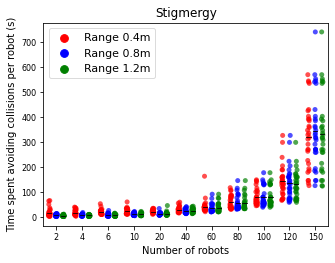

In [23]:
dx="number_of_robots"
dy="collision_sum"
dhue="range"
pal=["red","blue","green"]
data = total_collision

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Stigmergy")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time spent avoiding collisions per robot (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/comm_cong_collision_time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

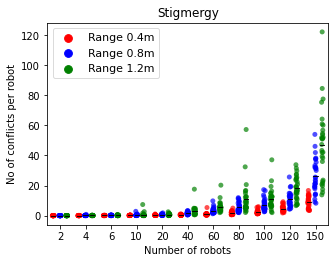

In [24]:
dx="number_of_robots"
dy="conflicts_sum"
dhue="range"
pal=["red","blue","green"]
data = total_conflicts

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Stigmergy")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.9},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("No of conflicts per robot",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/comm_cong_conflicts.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

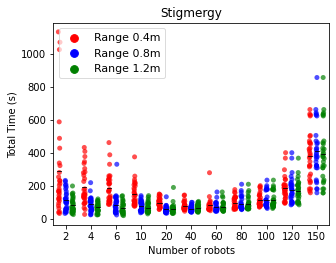

In [25]:
dx="number_of_robots"
dy="time"
dhue="range"
pal=["red","blue","green"]
data = total_time

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Stigmergy")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=12,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("/home/somz/Projects/Hierarchies_to_scale/Papers-soma/MRS - 2023/ieeeconf/figures/comm_cong_time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
t_conflicts = sns.load_dataset("total_conflicts").pivot("number_of_robots", "range", "conflicts_sum")
sns.heatmap(t_conflicts, cmap="crest")

Per State analysis for time and collisions

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_time_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_white

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()
        

Visitation frequency in a grid fashion 


In [ ]:

for robot in robots:
   for seed in seeds:
        for range_ in rab_ranges:

         black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']
         white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']


         fname = column_position(robot,seed,range_)
         print(fname)
         pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

         df = pd.DataFrame(pos_frame)
         df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
         state = df.filter(regex='state').melt()

         df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

         positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
         positionalDf = positionalDf.melt()
         positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
         positionalDf["state"] = state["value"]

         positionalDf_black = pd.concat(positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)
         positionalDf_white = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)

         x = list(positionalDf_white['position'].apply(lambda x: x[0]))
         y = list(positionalDf_white['position'].apply(lambda y: y[1]))

         f, ax = plt.subplots(figsize=(4.5,3.5))
         plt.rc('xtick', labelsize=10) 
         plt.rc('ytick', labelsize=10) 
         plt.title("Heatmap for white robots:" + str(robot) + " seed: "+str(seed))
         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
         extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
         plt.imshow(heatmap, origin='lower', extent=extent)
         plt.colorbar()
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         ax.set_ylabel("x (m)",fontsize=10)
         ax.set_xlabel("y (m)",fontsize=10)
         plt.tight_layout(pad=0.1)
         plt.savefig("heatmap_white_comm_congestion"+str(range_)+"_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
         plt.clf()        

         x = list(positionalDf_black['position'].apply(lambda x: x[0]))
         y = list(positionalDf_black['position'].apply(lambda y: y[1]))

         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        
         f, ax = plt.subplots(figsize=(5.5,4.75))
         plt.rc('xtick', labelsize=10) 
         plt.rc('ytick', labelsize=10) 
         plt.title("Heatmap for black robots:" + str(robot) + " seed: "+str(seed))
         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
         extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
         plt.imshow(heatmap, origin='lower', extent=extent)
         plt.colorbar()
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         plt.tight_layout(pad=1)
         ax.set_ylabel("x (m)",fontsize=10)
         ax.set_xlabel("y (m)",fontsize=10)
         plt.tight_layout(pad=0.1)
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         plt.savefig("heatmap_black_comm_congestion"+str(range_)+"_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
         plt.clf()





In [ ]:


for robot in robots:
   for range_ in rab_ranges:
      positionalDf_black = pd.DataFrame()
      positionalDf_white = pd.DataFrame()
         
      for seed in seeds:
            black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']
            white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
            fname = column_position(robot,seed,range_)
            #print(fname)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

            df = pd.DataFrame(pos_frame)
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            state = df.filter(regex='state').melt()

            df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

            positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf = positionalDf.melt()
            positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
            positionalDf["state"] = state["value"]

            positionalDf_black = pd.concat([positionalDf_black,positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)], ignore_index=True) 
            positionalDf_white = pd.concat([positionalDf_white,positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)], ignore_index=True)
      
      x = list(positionalDf_white['position'].apply(lambda x: x[0]))
      y = list(positionalDf_white['position'].apply(lambda y: y[1]))

      f, ax = plt.subplots(figsize=(5.5,4.75))
      plt.rc('xtick', labelsize=10) 
      plt.rc('ytick', labelsize=10) 
      plt.title("Heatmap for white robots:" + str(robot) + " range: "+str(range_/10))
      
      heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      plt.imshow(heatmap, origin='lower', extent=extent)
      plt.colorbar()
      plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      ax.set_ylabel("x (m)",fontsize=10)
      ax.set_xlabel("y (m)",fontsize=10)
      plt.tight_layout(pad=0.1)
      plt.savefig("heatmap_white_comm_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      plt.clf()        

      x = list(positionalDf_black['position'].apply(lambda x: x[0]))
      y = list(positionalDf_black['position'].apply(lambda y: y[1]))

      f, ax = plt.subplots(figsize=(5.5,4.75))
      plt.rc('xtick', labelsize=10) 
      plt.rc('ytick', labelsize=10) 
      plt.title("Heatmap for black robots:" + str(robot) + " range: "+str(range_/10))
      heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      plt.imshow(heatmap, origin='lower', extent=extent)
      plt.colorbar()
      plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      plt.tight_layout(pad=1)
      ax.set_ylabel("x (m)",fontsize=10)
      ax.set_xlabel("y (m)",fontsize=10)
      plt.tight_layout(pad=0.1)
      plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      plt.savefig("heatmap_black_comm_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      plt.clf()



In [ ]:
seeds = [i for i in range(1, 30)]
print(seeds)
robots = [40,80,120,150]
rab_ranges = [8]
white_values = ['white_followers']
exp_x = []
exp_y = []

for robot in robots:
   for range_ in rab_ranges:
      positionalDf_black = pd.DataFrame()
      positionalDf_white = pd.DataFrame()
         
      for seed in seeds:
            
            fname = column_position(robot,seed,range_)
            #print(fname)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

            df = pd.DataFrame(pos_frame)
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            state = df.filter(regex='state').melt()

            df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

            positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf = positionalDf.melt()
            positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
            positionalDf["state"] = state["value"]

            #positionalDf_black = pd.concat([positionalDf_black,positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)], ignore_index=True) 
            
            position = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)
            x = position['position'].apply(lambda x: x[0])
            y = position['position'].apply(lambda y: y[1])
            exp_x.append(x)
            exp_y.append(y)
      
      x = pd.concat(exp_x, ignore_index=True)
      y = pd.concat(exp_y, ignore_index=True)
      
      f, ax = plt.subplots(figsize=(4.6,4))
      plt.rc('xtick', labelsize=10) 
      plt.rc('ytick', labelsize=10) 
      plt.title("No of robots: "+str(robot))
      
      heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
      if (robot==150):
            plt.colorbar(fraction=0.046, pad=0.04)
      plt.clim(0,0.8)
      plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      if (robot==40):
            ax.set_ylabel("zone A followers (Stig app)\n x (m)",fontsize=10)
      else:
            ax.set_ylabel("x (m)",fontsize=10)
      ax.set_xlabel("y (m)",fontsize=10)
      plt.tight_layout(pad=0.2)
      plt.xticks(np.arange(-2,2.5,0.5))
      plt.yticks(np.arange(-2,2.5,0.5))
      plt.savefig("heatmap_white_followers_comm_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      plt.clf()    

In [ ]:
seeds = [i for i in range(1, 30)]
print(seeds)
robots = [40,80,120,150]
rab_ranges = [8]
white_values = ['nesters_white']
exp_x = []
exp_y = []

for robot in robots:
   for range_ in rab_ranges:
      positionalDf_black = pd.DataFrame()
      positionalDf_white = pd.DataFrame()
         
      for seed in seeds:
            
            fname = column_position(robot,seed,range_)
            #print(fname)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

            df = pd.DataFrame(pos_frame)
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            state = df.filter(regex='state').melt()

            df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

            positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf = positionalDf.melt()
            positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
            positionalDf["state"] = state["value"]

            #positionalDf_black = pd.concat([positionalDf_black,positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)], ignore_index=True) 
            
            position = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)
            x = position['position'].apply(lambda x: x[0])
            y = position['position'].apply(lambda y: y[1])
            exp_x.append(x)
            exp_y.append(y)
      
      x = pd.concat(exp_x, ignore_index=True)
      y = pd.concat(exp_y, ignore_index=True)
      
      f, ax = plt.subplots(figsize=(4.6,4))
      plt.rc('xtick', labelsize=10) 
      plt.rc('ytick', labelsize=10) 
      plt.title("No of robots: "+str(robot))
      
      heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
      if (robot==150):
            plt.colorbar(fraction=0.046, pad=0.04)
      plt.clim(0,0.8)
      plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      if (robot==40):
            ax.set_ylabel("zone A advertisers (Stig app)\n x (m)",fontsize=10)
      else:
            ax.set_ylabel("x (m)",fontsize=10)
      ax.set_xlabel("y (m)",fontsize=10)
      plt.tight_layout(pad=0.2)
      plt.xticks(np.arange(-2,2.5,0.5))
      plt.yticks(np.arange(-2,2.5,0.5))
      plt.savefig("heatmap_white_advertisers_comm_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      plt.clf()    

In [ ]:
# seeds = [i for i in range(1, 30)]
seeds=[1]
print(seeds)
robots = [80]
rab_ranges = [8]
white_values = ['white_followers']
threshold = 10
exp_x = []
exp_y = []

for robot in robots:
   for range_ in rab_ranges:
      positionalDf_black = pd.DataFrame()
      positionalDf_white = pd.DataFrame()
         
      for seed in seeds:
            
            fname = column_position(robot,seed,range_)
            #print(fname)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

            df = pd.DataFrame(pos_frame)
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            state = df.filter(regex='state').melt()

            df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

            positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
            positionalDf = positionalDf.melt()
            positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
            positionalDf["state"] = state["value"]

            #positionalDf_black = pd.concat([positionalDf_black,positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)], ignore_index=True) 
            
            position = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)
            x = position['position'].apply(lambda x: x[0])
            y = position['position'].apply(lambda y: y[1])
            exp_x.append(x)
            exp_y.append(y)
      
      x = pd.concat(exp_x, ignore_index=True)
      y = pd.concat(exp_y, ignore_index=True)
      
      f, ax = plt.subplots(figsize=(4.6,4))
      plt.rc('xtick', labelsize=10) 
      plt.rc('ytick', labelsize=10) 
      plt.title("No of robots: "+str(robot))
      
      heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=True)
      extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
      plt.imshow(heatmap, origin='lower', extent=extent,cmap='RdBu')
      if (robot==150):
            plt.colorbar(fraction=0.046, pad=0.04)
      plt.clim(0,0.8)
      plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
      if (robot==40):
            ax.set_ylabel("zone A advertisers (Stig app)\n x (m)",fontsize=10)
      else:
            ax.set_ylabel("x (m)",fontsize=10)
      ax.set_xlabel("y (m)",fontsize=10)
      plt.tight_layout(pad=0.2)
      plt.xticks(np.arange(-2,2.5,0.5))
      plt.yticks(np.arange(-2,2.5,0.5))
      plt.savefig("heatmap_white_advertisers_comm_congestion"+str(robot)+"_"+str(range_)+".pdf", dpi=600, format="pdf", transparent=False)
      plt.clf()    

In [ ]:
x = list(positionalDf_black['position'].apply(lambda x: x[0]))
y = list(positionalDf_black['position'].apply(lambda y: y[1]))

heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        
f, ax = plt.subplots(figsize=(5.5,4.75))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.title("Heatmap for comm_congestion black robots:" + str(robot) + " seed: "+str(seed))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap, origin='lower', extent=extent)
plt.colorbar()
plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
plt.tight_layout(pad=1)
ax.set_ylabel("x (m)",fontsize=10)
ax.set_xlabel("y (m)",fontsize=10)
plt.tight_layout(pad=0.1)
plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
plt.savefig("heatmap_black_comm_congestion"+str(range_)+"_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
plt.clf()

In [27]:
# robots = [2]
rab_ranges = [4]
#seeds = [1]
threshold = 10
percent_end = 15
seeds = [i for i in range(0, 30)]
robots = [60,80,100,120,150]
exp_x = []
exp_y = []
white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
positionalDf_white = pd.DataFrame()

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            df = pd.DataFrame(pos_frame)
            df = df.tail(int(len(df) * percent_end / 100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            df_state = df.filter(regex='state')
            # delta_df_x = df_x.diff()
            # delta_df_y = df_y.diff()
            # delta_df_x = delta_df_x.replace(np.nan,0)
            # delta_df_x = delta_df_x.add_prefix('del_')
            # delta_df_y = delta_df_y.replace(np.nan,0)
            # delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]
            # agg_df["delta_x"] = pd.melt(delta_df_x,var_name='robot', value_name='delta_x')["delta_x"]
            # agg_df["delta_y"] = pd.melt(delta_df_y,var_name='robot', value_name='delta_y')["delta_y"]
            agg_df["state"] = pd.melt(df_state,var_name='robot', value_name='state')["state"]

            df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            df_white['bin_x'] = pd.cut(df_white["x"], bins=np.arange(-2,2.2,0.2),labels=False)
            df_white['bin_y'] = pd.cut(df_white["y"], bins=np.arange(-2,2.2,0.2),labels=False)
            df_white['combine_bin']= df_white['robot'].astype(str)+df_white['bin_x'].astype(str) + df_white['bin_y'].astype(str)
            df_white['Occurrences'] = df_white.groupby((df_white['combine_bin'] != df_white['combine_bin'].shift()).cumsum()).cumcount() + 1
            mask = df_white['combine_bin'] != df_white['combine_bin'].shift(-1)
            df_result = df_white[mask]

            df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
            exp_x.append(df_plot['x'])
            exp_y.append(df_plot['y'])
            
            #positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            #positionalDf_white['Occurrences'] = positionalDf_white.groupby(['bin_x', 'bin_y']).groupby((df['Value'] != df['Value'].shift()).cumsum()).cumsum()

            
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
      
    f, ax = plt.subplots(figsize=(3.8,3.5))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("Stigmergy (N="+str(robot)+",T=end)",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap/1000, origin='lower', extent=extent,cmap='gist_ncar',norm=matplotlib.colors.Normalize(vmin=0.0,vmax=1.00))
    if (robot==150):
        plt.colorbar(fraction=0.046, pad=0.04)
    #plt.clim(0,5000)
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    if (robot==60):
            ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
    else:
            ax.set_ylabel("x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    plt.tight_layout(pad=0.3)
    plt.xticks(np.arange(-2,2.5,0.5))
    plt.yticks(np.arange(-2,2.5,0.5))
    plt.savefig(FIG_DIR+"comm/heatmap_white_end_comm_stagnation_normalized"+str(robot)+"_"+str(threshold)+"_"+str(percent_end)+".pdf", dpi=900, format="pdf", transparent=False)
    plt.clf()  

<Figure size 273.6x252 with 0 Axes>

<Figure size 273.6x252 with 0 Axes>

<Figure size 273.6x252 with 0 Axes>

<Figure size 273.6x252 with 0 Axes>

<Figure size 273.6x252 with 0 Axes>

In [ ]:
hist = df_white.hist(column='Occurrences', bins=100)

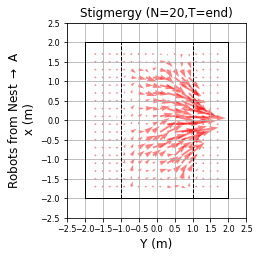

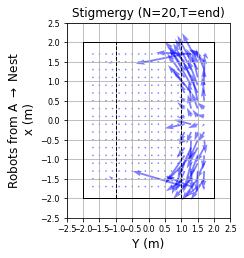

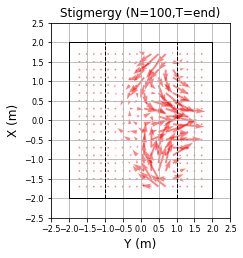

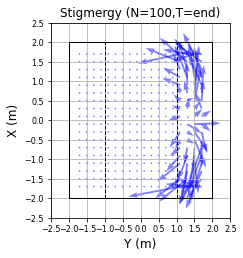

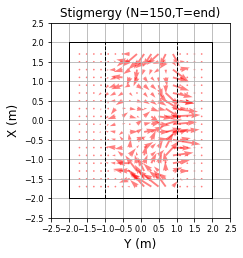

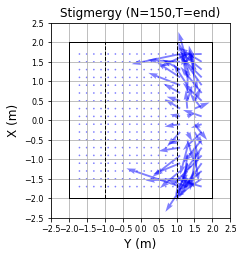

In [34]:
robots = [20,100,150]
rab_ranges = [4]
seeds = [i for i in range(0, 30)]
percent_end = 15

white_values = ['white_followers']
nest_values = ["nesters_white"]

for robot in robots:
    for range_ in rab_ranges:
        positionalDf_white = pd.DataFrame()
        positionalDf_nest = pd.DataFrame()
        for seed in seeds:
            fname = column_position(robot,seed,range_)
            pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))
            
            df = pd.DataFrame(pos_frame)
            df = df.tail(int(len(df)*percent_end/100))
            df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
            df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
            df_x = df.filter(regex='x')
            df_y = df.filter(regex='y')
            df_state = df.filter(regex='state')
            delta_df_x = df_x.diff()
            delta_df_y = df_y.diff()
            delta_df_x = delta_df_x.replace(np.nan,0)
            delta_df_x = delta_df_x.add_prefix('del_')
            delta_df_y = delta_df_y.replace(np.nan,0)
            delta_df_y = delta_df_y.add_prefix('del_')

            agg_df = pd.melt(df_x,var_name='robot', value_name='x')
            agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]
            agg_df["delta_x"] = pd.melt(delta_df_x,var_name='robot', value_name='delta_x')["delta_x"]
            agg_df["delta_y"] = pd.melt(delta_df_y,var_name='robot', value_name='delta_y')["delta_y"]
            agg_df["state"] = pd.melt(df_state,var_name='robot', value_name='state')["state"]

            

            df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
            df_white['bin_x'] = pd.cut(df_white["x"], bins=np.arange(-1.8,2.0,0.2), labels=np.arange(-1.7,1.9,0.2))
            df_white['bin_y'] = pd.cut(df_white["y"], bins=np.arange(-1.8,2.0,0.2), labels=np.arange(-1.7,1.9,0.2))

            df_nest = agg_df.loc[agg_df['state'].isin(nest_values)].reset_index(drop=True)
            df_nest['bin_x'] = pd.cut(df_nest["x"], bins=np.arange(-1.8,2.0,0.2), labels=np.arange(-1.7,1.9,0.2))
            df_nest['bin_y'] = pd.cut(df_nest["y"], bins=np.arange(-1.8,2.0,0.2), labels=np.arange(-1.7,1.9,0.2))
            

            positionalDf_white = pd.concat([positionalDf_white,df_white], ignore_index=True) 
            positionalDf_nest = pd.concat([positionalDf_nest,df_nest], ignore_index=True)
            


    df_grouped_white = positionalDf_white.groupby(['bin_x', 'bin_y']).agg(x=('delta_x', np.sum),y=('delta_y', np.sum))
    df_final_white = df_grouped_white.reset_index()
    df_final_white["x"] = df_final_white["x"]/robot
    df_final_white["y"] = df_final_white["y"]/robot 
    df_final_white["magnitude"] = np.sqrt(df_final_white["x"]**2 + df_final_white["y"]**2)
    df_final_white["magnitude"] = df_final_white["magnitude"].replace(0,1)
    df_final_white["x_norm"] = df_final_white["x"]/df_final_white["magnitude"]
    df_final_white["y_norm"] = df_final_white["y"]/df_final_white["magnitude"]


    df_grouped_nest = positionalDf_nest.groupby(['bin_x', 'bin_y']).agg(x=('delta_x', np.sum),y=('delta_y', np.sum))
    df_final_nest = df_grouped_nest.reset_index()
    df_final_nest["x"] = df_final_nest["x"]/robot
    df_final_nest["y"] = df_final_nest["y"]/robot 
    df_final_nest["magnitude"] = np.sqrt(df_final_nest["x"]**2 + df_final_nest["y"]**2)
    df_final_nest["magnitude"] = df_final_nest["magnitude"].replace(0,1)
    df_final_nest["x_norm"] = df_final_nest["x"]/df_final_nest["magnitude"]
    df_final_nest["y_norm"] = df_final_nest["y"]/df_final_nest["magnitude"]

    fig, ax = plt.subplots(figsize =(3.55, 3.75))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("Stigmergy (N="+str(robot)+",T=end)")
    ax.quiver(df_final_white['bin_y'],df_final_white['bin_x'],df_final_white['y'],df_final_white['x'], units='xy', color='red', alpha=0.5, width=0.05)
    ax.set_xlabel('Y (m)', fontsize=12)
    ax.set_ylabel('X (m)', fontsize=12)
    ax.axis([-2.5, 2.5, -2.5, 2.5])
    #ax.set_aspect('equal')
    plt.xticks(np.arange(-2.5,3.0,0.5))
    plt.yticks(np.arange(-2.5,3.0,0.5))
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=1, linestyle = 'dashed')
    plt.plot([-2, -2], [-2, 2], [2,2], [-2, 2],[-2,2],[-2,-2],[2,-2],[2,2], color='black', linewidth=1)
    #plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    plt.tight_layout(pad=1.3)
    if (robot==20):
        ax.set_ylabel(r"Robots from Nest $\rightarrow$ A" "\n x (m)",fontsize=12)

    plt.grid()
    plt.savefig(FIG_DIR+"quiver/quiver_plot_white_"+str(robot)+".pdf",dpi=900,format="pdf",transparent=False)


    fig, ax = plt.subplots(figsize =(3.55, 3.75))
    plt.rc('xtick', labelsize=8) 
    plt.rc('ytick', labelsize=8) 
    plt.title("Stigmergy (N="+str(robot)+",T=end)")
    ax.quiver(df_final_nest['bin_y'],df_final_nest['bin_x'],df_final_nest['y'],df_final_nest['x'], units='xy', color='blue', alpha=0.5, width=0.05)
    ax.set_xlabel('Y (m)', fontsize=12)
    ax.set_ylabel('X (m)', fontsize=12)
    ax.axis([-2.5, 2.5, -2.5, 2.5])
    #ax.set_aspect('equal')
    plt.xticks(np.arange(-2.5,3.0,0.5))
    plt.yticks(np.arange(-2.5,3.0,0.5))
    plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=1, linestyle = 'dashed')
    plt.plot([-2, -2], [-2, 2], [2,2], [-2, 2],[-2,2],[-2,-2],[2,-2],[2,2], color='black', linewidth=1)
    #plt.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2)

    if (robot==20):
        ax.set_ylabel(r"Robots from A $\rightarrow$ Nest" "\n x (m)",fontsize=12)
    plt.tight_layout(pad=1.3)
    plt.grid()
    plt.savefig(FIG_DIR+"quiver/quiver_plot_nest"+str(robot)+".pdf",dpi=900,format="pdf",transparent=False)


    # show plot
    plt.show()

In [93]:
robot = 150
seeds =[i for i in range(0,30)]
rab_range = 8
time_steps = [i for i in range(0,100,5)]
threshold = 10 
exp_x = []
exp_y = []

white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']

ims = []

f, ax = plt.subplots(figsize=(12,6),dpi=900)



div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
# im = ax.imshow([], origin='lower')
# cb = fig.colorbar(im, cax=cax)


def update_func(i):
    exp_x = []
    exp_y = []
    for seed in seeds:
                fname = column_position(robot,seed,rab_range)
                pos_frame = pd.read_csv(fname,sep=',',names=get_names_for_position(robot))
                df = pd.DataFrame(pos_frame)
                df = df.iloc[int(len(df) * (10*i)/ 100):int(len(df) * (10*i + 10)/ 100)]
                
                df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
                df_x = df.filter(regex='x')
                df_y = df.filter(regex='y')

                df_state = df.filter(regex='state')
                agg_df = pd.melt(df_x,var_name='robot', value_name='x')
                agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]
                agg_df["state"] = pd.melt(df_state,var_name='robot', value_name='state')["state"]

                df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
                df_white['bin_x'] = pd.cut(df_white["x"], bins=np.arange(-2,2.2,0.2),labels=False)
                df_white['bin_y'] = pd.cut(df_white["y"], bins=np.arange(-2,2.2,0.2),labels=False)
                df_white['combine_bin']= df_white['robot'].astype(str)+df_white['bin_x'].astype(str) + df_white['bin_y'].astype(str)
                df_white['Occurrences'] = df_white.groupby((df_white['combine_bin'] != df_white['combine_bin'].shift()).cumsum()).cumcount() + 1
                mask = df_white['combine_bin'] != df_white['combine_bin'].shift(-1)
                df_result = df_white[mask]

                df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
                exp_x.append(df_plot['x'])
                exp_y.append(df_plot['y'])
        
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
            #plt.rc('xtick', labelsize=8) 
            #plt.rc('ytick', labelsize=8) 
    #plt.clf()

    ax.clear()
    cax.clear()
    f.suptitle("Stigmergy app. (N="+str(robot)+",Ts=:"+str(10*i)+",Tf=:"+str(10*i+10)+")",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(heatmap, origin='lower', extent=extent,cmap='gist_ncar',animated=True,interpolation='none', aspect='auto',vmin=0,vmax=300)  

    f.colorbar(im, cax=cax, orientation='vertical')
    ax.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)


ani = animation.FuncAnimation(f, update_func, interval=500,frames=10)
ani.save(str(robot)+"movie.mkv",dpi=900)

        
            

In [ ]:
robot = 100
seeds =[i for i in range(0,30)]
rab_range = 8
time_steps = [i for i in range(0,100,5)]
threshold = 10 
exp_x = []
exp_y = []

white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']

ims = []

f, ax = plt.subplots(figsize=(12,6),dpi=900)



div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
# im = ax.imshow([], origin='lower')
# cb = fig.colorbar(im, cax=cax)


def update_func(i):
    exp_x = []
    exp_y = []
    for seed in seeds:
                fname = column_position(robot,seed,rab_range)
                pos_frame = pd.read_csv(fname,sep=',',names=get_names_for_position(robot))
                df = pd.DataFrame(pos_frame)
                df = df.iloc[int(len(df) * (10*i)/ 100):int(len(df) * (10*i + 10)/ 100)]
                
                df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
                df_x = df.filter(regex='x')
                df_y = df.filter(regex='y')

                df_state = df.filter(regex='state')
                agg_df = pd.melt(df_x,var_name='robot', value_name='x')
                agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]
                agg_df["state"] = pd.melt(df_state,var_name='robot', value_name='state')["state"]

                df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
                df_white['bin_x'] = pd.cut(df_white["x"], bins=np.arange(-2,2.2,0.2),labels=False)
                df_white['bin_y'] = pd.cut(df_white["y"], bins=np.arange(-2,2.2,0.2),labels=False)
                df_white['combine_bin']= df_white['robot'].astype(str)+df_white['bin_x'].astype(str) + df_white['bin_y'].astype(str)
                df_white['Occurrences'] = df_white.groupby((df_white['combine_bin'] != df_white['combine_bin'].shift()).cumsum()).cumcount() + 1
                mask = df_white['combine_bin'] != df_white['combine_bin'].shift(-1)
                df_result = df_white[mask]

                df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
                exp_x.append(df_plot['x'])
                exp_y.append(df_plot['y'])
        
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
            #plt.rc('xtick', labelsize=8) 
            #plt.rc('ytick', labelsize=8) 
    #plt.clf()

    ax.clear()
    cax.clear()
    f.suptitle("Stigmergy app. (N="+str(robot)+",Ts=:"+str(10*i)+" ,Tf=:"+str(10*i+10)+")",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(heatmap, origin='lower', extent=extent,cmap='gist_ncar',animated=True,interpolation='none', aspect='auto',vmin=0,vmax=300)  

    f.colorbar(im, cax=cax, orientation='vertical')
    ax.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)


ani = animation.FuncAnimation(f, update_func, interval=500,frames=10)
ani.save(str(robot)+"movie.mp4")

In [9]:
robot = 40
seeds =[i for i in range(0,30)]
rab_range = 8
time_steps = [i for i in range(0,100,5)]
threshold = 10 
exp_x = []
exp_y = []

white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']
black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']

ims = []

f, ax = plt.subplots(figsize=(12,6),dpi=900)



div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')
# im = ax.imshow([], origin='lower')
# cb = fig.colorbar(im, cax=cax)


def update_func(i):
    exp_x = []
    exp_y = []
    for seed in seeds:
                fname = column_position(robot,seed,rab_range)
                pos_frame = pd.read_csv(fname,sep=',',names=get_names_for_position(robot))
                df = pd.DataFrame(pos_frame)
                df = df.iloc[int(len(df) * (10*i)/ 100):int(len(df) * (10*i + 10)/ 100)]
                
                df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
                df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
                df_x = df.filter(regex='x')
                df_y = df.filter(regex='y')

                df_state = df.filter(regex='state')
                agg_df = pd.melt(df_x,var_name='robot', value_name='x')
                agg_df["y"] = pd.melt(df_y,var_name='robot', value_name='y')["y"]
                agg_df["state"] = pd.melt(df_state,var_name='robot', value_name='state')["state"]

                df_white = agg_df.loc[agg_df['state'].isin(white_values)].reset_index(drop=True)
                df_white['bin_x'] = pd.cut(df_white["x"], bins=np.arange(-2,2.2,0.2),labels=False)
                df_white['bin_y'] = pd.cut(df_white["y"], bins=np.arange(-2,2.2,0.2),labels=False)
                df_white['combine_bin']= df_white['robot'].astype(str)+df_white['bin_x'].astype(str) + df_white['bin_y'].astype(str)
                df_white['Occurrences'] = df_white.groupby((df_white['combine_bin'] != df_white['combine_bin'].shift()).cumsum()).cumcount() + 1
                mask = df_white['combine_bin'] != df_white['combine_bin'].shift(-1)
                df_result = df_white[mask]

                df_plot = df_result[df_result['Occurrences'] >= threshold].reset_index(drop=True)
                exp_x.append(df_plot['x'])
                exp_y.append(df_plot['y'])
        
    x = pd.concat(exp_x, ignore_index=True)
    y = pd.concat(exp_y, ignore_index=True)
            #plt.rc('xtick', labelsize=8) 
            #plt.rc('ytick', labelsize=8) 
    #plt.clf()

    ax.clear()
    cax.clear()
    f.suptitle("Stigmergy app. (N="+str(robot)+",Ts=:"+str(10*i)+",Tf=:"+str(10*i+10)+")",fontsize=12)
      
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2.2,0.2),np.arange(-2,2.2,0.2)],density=False)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    im = ax.imshow(heatmap, origin='lower', extent=extent,cmap='gist_ncar',animated=True,interpolation='none', aspect='auto',vmin=0,vmax=300)  

    f.colorbar(im, cax=cax, orientation='vertical')
    ax.plot([1, 1], [-2, 2], [-1,-1], [-2, 2], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
    ax.set_ylabel("Stagnation heatmap (Z=A)\n x (m)",fontsize=12)
    ax.set_xlabel("y (m)",fontsize=12)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)


ani = animation.FuncAnimation(f, update_func, interval=500,frames=11)
ani.save(str(robot)+"movie.mp4")